Plot the phase diagram for an Ising system on a three block chain-like SBM with external fields.

Uses data from simulations generated using *fig2-B-simulations.py*.

**Sources:**
- Customisation of heatmap tick labels based on: https://stackoverflow.com/questions/47784215/seaborn-heatmap-custom-tick-values. 

Created on: 07/12/19

In [1]:
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def from_np_array(array_string):
    '''
    Converter allows numpy arrays saved in a .csv file
    to be parsed as an array rather than being interpretted
    as a string.
    '''
    array_string = ' '.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))


f_path_block = "Data/block_level_phase_data.csv"
mag_data_block = pd.read_csv(f_path_block)

mag_data_MF=pd.DataFrame()
for p in range(10) :
    f_path_full_graph = f"Data/ensemble/full_MF_phase_data_{p}.csv"
    # f_path_full_graph = f"Data/ens_temp/full_MF_phase_data_{p}.csv"
    mag_data_MF_current = pd.read_csv(f_path_full_graph)
    mag_data_MF_current['graph']=p*np.ones(len(mag_data_MF_current))
    
    mag_data_MF = mag_data_MF.append(mag_data_MF_current)


In [3]:
mag_data_MF=mag_data_MF.rename(columns={'graph':'Graph'})
mag_data_MF['Graph']=[int(k+1) for k in mag_data_MF['Graph'].to_list()]

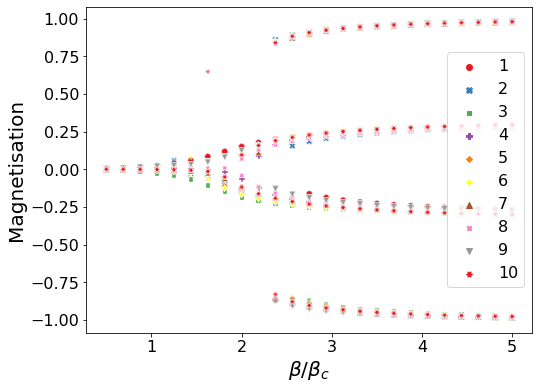

In [4]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=mag_data_MF,x='beta_factor',y='Mean_mag_MF',hue='Graph',palette='Set1',style='Graph',alpha=0.6)
#sns.scatterplot(data=mag_data_block,x='beta_factor',y='Mean_mag_block')

plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16,rotation=0)
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.legend(fontsize=16)
plt.savefig("Plots/MF_ensemble_phase_diag.jpg",bbox_inches='tight')

#Q: perhaps a histogram over the ensemble might work?